# QuTiP example: Physical implementation of Spin Chain Qubit model


Author: Anubhav Vardhan (anubhavvardhan@gmail.com)

Numerical simulation added by Boxi Li (etamin1201@gmail.com)

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
%matplotlib inline

In [2]:
from qutip.qip.circuit import QubitCircuit
from qutip.qip.operations import gate_sequence_product
import numpy as np

If your qutip version is lower than 4.4.1 please run the following cell

In [ ]:
from qutip.qip.models.spinchain import CircularSpinChain
from qutip.qip.models.spinchain import LinearSpinChain

Otherwise please run this cell

In [3]:
from qutip.qip.device import CircularSpinChain, LinearSpinChain
from qutip.qip.noise import RandomNoise

## Hamiltonian:


$\displaystyle H = - \frac{1}{2}\sum_n^N h_n \sigma_z(n) - \frac{1}{2} \sum_n^{N-1} [ J_x^{(n)} \sigma_x(n) \sigma_x(n+1) + J_y^{(n)} \sigma_y(n) \sigma_y(n+1) +J_z^{(n)} \sigma_z(n) \sigma_z(n+1)]$

The linear and circular spin chain models employing the nearest neighbor interaction can be implemented using the SpinChain class.

## Circuit Setup

In [4]:
N = 3
qc = QubitCircuit(N)

qc.add_gate("CNOT", targets=[0], controls=[2])

The non-adjacent interactions are broken into a series of adjacent ones by the program automatically.

In [5]:
U_ideal = gate_sequence_product(qc.propagators())

U_ideal

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]

## Circular Spin Chain Model Implementation

In [6]:
p1 = CircularSpinChain(N, correct_global_phase=True)

U_list = p1.run(qc)

U_physical = gate_sequence_product(U_list)

U_physical.tidyup(atol=1e-5)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]

In [7]:
(U_ideal - U_physical).norm()

0.0

The results obtained from the physical implementation agree with the ideal result.

In [8]:
p1.qc0.gates

[Gate(CNOT, targets=[0], controls=[2])]

The gates are first convert to gates with adjacent interactions moving in the direction with the least number of qubits in between.

In [9]:
p1.qc1.gates

[Gate(CNOT, targets=[0], controls=[2])]

They are then converted into the basis [ISWAP, RX, RZ]

In [10]:
p1.qc2.gates

[Gate(GLOBALPHASE, targets=None, controls=None),
 Gate(ISWAP, targets=[2, 0], controls=None),
 Gate(RZ, targets=[0], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(RX, targets=[2], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(ISWAP, targets=[2, 0], controls=None),
 Gate(RZ, targets=[0], controls=None),
 Gate(RX, targets=[0], controls=None),
 Gate(RZ, targets=[0], controls=None),
 Gate(RZ, targets=[0], controls=None)]

The time for each applied gate:

In [11]:
p1.get_full_tlist()

array([0.   , 1.25 , 1.375, 1.5  , 2.   , 2.125, 2.25 , 3.5  , 3.625,
       4.125, 4.25 , 4.375])

The pulse can be plotted as:

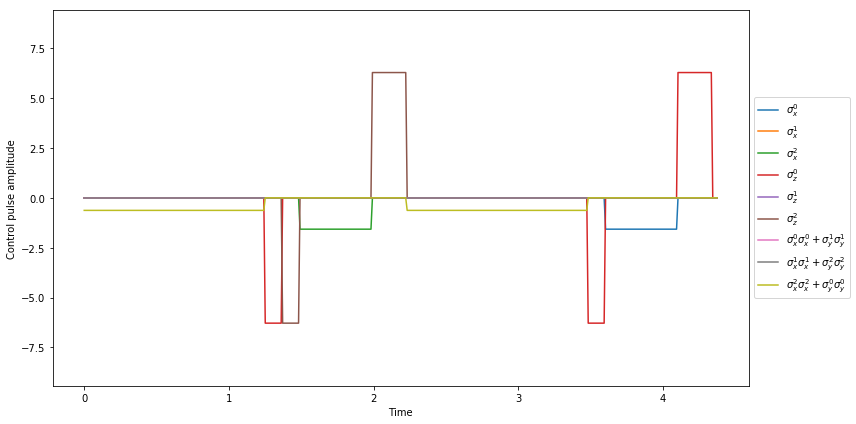

In [12]:
p1.plot_pulses();

## Linear Spin Chain Model Implementation

In [13]:
p2 = LinearSpinChain(N, correct_global_phase=True)

U_list = p2.run(qc)

U_physical = gate_sequence_product(U_list)

U_physical.tidyup(atol=1e-5)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]

In [14]:
(U_ideal - U_physical).norm()

0.0

The results obtained from the physical implementation agree with the ideal result.

In [15]:
p2.qc0.gates

[Gate(CNOT, targets=[0], controls=[2])]

The gates are first convert to gates with adjacent interactions moving in the direction with the least number of qubits in between.

In [16]:
p2.qc1.gates

[Gate(SWAP, targets=[0, 1], controls=None),
 Gate(CNOT, targets=[1], controls=[2]),
 Gate(SWAP, targets=[0, 1], controls=None)]

They are then converted into the basis [ISWAP, RX, RZ]

In [17]:
p2.qc2.gates

[Gate(GLOBALPHASE, targets=None, controls=None),
 Gate(ISWAP, targets=[0, 1], controls=None),
 Gate(RX, targets=[0], controls=None),
 Gate(ISWAP, targets=[0, 1], controls=None),
 Gate(RX, targets=[1], controls=None),
 Gate(ISWAP, targets=[1, 0], controls=None),
 Gate(RX, targets=[0], controls=None),
 Gate(GLOBALPHASE, targets=None, controls=None),
 Gate(ISWAP, targets=[2, 1], controls=None),
 Gate(RZ, targets=[1], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(RX, targets=[2], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(ISWAP, targets=[2, 1], controls=None),
 Gate(RZ, targets=[1], controls=None),
 Gate(RX, targets=[1], controls=None),
 Gate(RZ, targets=[1], controls=None),
 Gate(RZ, targets=[1], controls=None),
 Gate(GLOBALPHASE, targets=None, controls=None),
 Gate(ISWAP, targets=[0, 1], controls=None),
 Gate(RX, targets=[0], controls=None),
 Gate(ISWAP, targets=[0, 1], controls=None),
 Gate(RX, targets=[1], controls

The time for each applied gate:

In [18]:
p2.get_full_tlist()

array([ 0.   ,  1.25 ,  1.75 ,  3.   ,  3.5  ,  4.75 ,  5.25 ,  6.5  ,
        6.625,  6.75 ,  7.25 ,  7.375,  7.5  ,  8.75 ,  8.875,  9.375,
        9.5  ,  9.625, 10.875, 11.375, 12.625, 13.125, 14.375, 14.875])

The pulse can be plotted as:

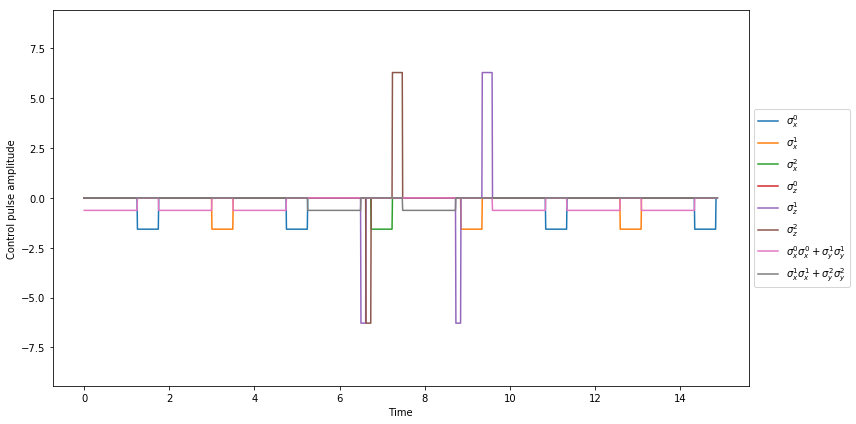

In [19]:
p2.plot_pulses();

## Numerical simulation
From QuTiP 4.5, we also add the possibility to allow numerical simulation of `SpinChain`-based quantum computing. One needs only to add an option `analytical=False` in `run_state` to use one of the QuTiP solvers to simulate the state evolution instead of direct matrix product. Under numerical simulation, one can go beyond simulation with perfect gate operations. All the noise defined for the class `Processor` can also be used for `SpinChain` here.

In [23]:
from qutip import basis, fidelity
N = 1
plus_state = (basis(2,0) + basis(2,1)).unit()

qc = QubitCircuit(N=N)
qc.add_gate("SNOT", targets=0)
processor = LinearSpinChain(N=N)
processor.load_circuit(qc)
end_state = processor.run_state(init_state=basis(2, 0), analytical=False).states[-1]
fidelity(end_state, plus_state)

1.0000000052671834

In [24]:
processor.add_noise(RandomNoise(rand_gen=np.random.normal, dt=0.1, loc=0.1, scale=0.2))
end_state = processor.run_state(init_state=basis(2, 0), analytical=False).states[-1]
fidelity(end_state, plus_state)

0.9915047030474844

As the control noise is coherent noise, the result of this noise is still a pure state. Therefore, we can visualize it on a Bloch sphere.

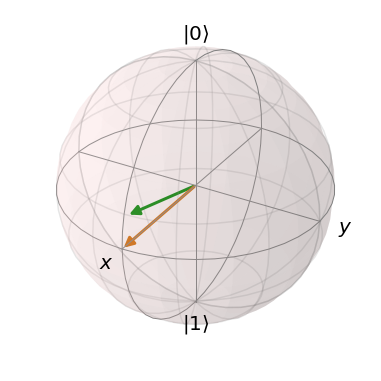

In [25]:
from qutip.bloch import Bloch
b = Bloch()
b.add_states([end_state, plus_state])
b.make_sphere()

### Software versions:

In [25]:
from qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,4.5.0.dev0+c50c4bc9
Numpy,1.16.2
SciPy,1.2.1
matplotlib,3.0.3
Cython,0.29.12
Number of CPUs,12
BLAS Info,INTEL MKL
IPython,7.4.0
Python,"3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]"
OS,nt [win32]
